COMP647 Assignment 3

Student Name: Joyce Lee

Student ID: 1164049

### 📑 Table of Contents

1. [Feature Engineering](#1-feature-engineering)
    - [1.1 Binary Encoding](#11-binary-encoding)
    - [1.2 One-Hot Encoding](#12-one-hot-encoding)
    - [1.3 Feature Scaling](#13-feature-standard-scaling)
    - [1.4 Summary](#14-summary)
2. [Feature Selection](#2-feature-selection)
    - [2.1 ANOVA - Analysis of Variance](#21-anova---analysis-of-variance)
    - [2.2 Chi-square Test](#22-chi-square-test)
    - [2.3 Random Forest Feature Importance](#23-random-forest-feature-importance)
    - [2.4 Feature Selection Summary](#24-feature-selection-summary)
3. [Model Training & Evaluation](#3-supervised-learning---model-training--evaluation)
    - [3.1 Baseline Models](#31-baseline-models)
        - [3.1.1 Logistic Regression](#311-linear-method-logistic-regression)
        - [3.1.2 Ensemble Methods](#312-ensemble-method-random-forestgradient-boosting)
        - [3.1.3 SVC](#313-kernel-based-methods---svc)
        - [3.1.4 Summary](#314-summary-of-baseline-models)
    - [3.2 Class Balancing Models](#32-class-balancing-models)
    - [3.3 Hyperparameter Optimization](#33-hyperparameter-optimization)
    - [3.4 Model Comparison & Selection](#34-model-comparison--selection)
4. [Overfitting & Underfitting](#4-overfitting--underfitting)
    - [4.1 Mitigation](#41-mitigation)
    - [4.2 Training vs Test Accuracy](#42-training-vs-test-accuracy)
    - [4.3 Summary](#43-summary)
5. [eXplainable AI](#5-explainable-ai---xai)
    - [5.1 LIME](#51-lime)
    - [5.2 SHAP](#52-shap)
    - [5.3 Comparison of LIME vs SHAP](#53-summary-and-comparison-of-lime-vs-shap)

---

In [80]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame
pd.set_option('display.max_rows', None)

In [81]:
#load dataset
df = pd.read_csv('data/telco_customer_churn_cleaned.csv')
df.shape

(7043, 33)

In [82]:
#to drop irrelevant or leakage-prone columns
df = df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 
                 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
                 'Total Charges', 'Churn Label', 'Churn Score', 'CLTV',
                 'Churn Reason'])
df.shape

(7043, 19)

In [83]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

# 1. Feature Engineering

- Binary encoding for Yes/No categories
- One-hot encoding for more than two categories without order, 'Internet Service', 'Contract', and 'Payment Method'
- Standard scaling for 'Tenure Months' and 'Monthly Charges'
- For 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',  'Streaming TV',	'Streaming Movies', Merge 'No internet service' into 'No' because already have Internet Service (DSL/Fiber Optic/No) representing no-internet customers
- same for 'Multiple lines'-no phone service

## 1.1 Binary Encoding

In [85]:
#to merge 'No internet service' into 'No'
replace_cols = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

#to merge 'No phone service' into 'No'
df['Multiple Lines'] = df['Multiple Lines'].replace({'No phone service': 'No'})

#to encode binary categorical variables
binary_cols = ['Senior Citizen', 'Partner', 'Dependents', 
               'Phone Service', 'Multiple Lines', 
               'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
               'Paperless Billing']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

## 1.2 One-Hot Encoding

In [86]:
#to encode gender (binary categorical)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

#to encode internet service type using one-hot encoding
df = pd.get_dummies(df, columns=['Internet Service'], prefix='Internet_Service', drop_first=False)
#to encode contract type using one-hot encoding
df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=False)
#to encode payment method using one-hot encoding
df = pd.get_dummies(df, columns=['Payment Method'], prefix='Payment_Method', drop_first=False)

In [87]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Churn Value,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,True,False,False,True,False,False,False,False,False,True
1,0,0,0,1,2,1,0,0,0,0,0,0,0,1,70.70,1,False,True,False,True,False,False,False,False,True,False
2,0,0,0,1,8,1,1,0,0,1,0,1,1,1,99.65,1,False,True,False,True,False,False,False,False,True,False
3,0,0,1,1,28,1,1,0,0,1,1,1,1,1,104.80,1,False,True,False,True,False,False,False,False,True,False
4,1,0,0,1,49,1,1,0,1,1,0,1,1,1,103.70,1,False,True,False,True,False,False,True,False,False,False


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    7043 non-null   int64  
 1   Senior Citizen                            7043 non-null   int64  
 2   Partner                                   7043 non-null   int64  
 3   Dependents                                7043 non-null   int64  
 4   Tenure Months                             7043 non-null   int64  
 5   Phone Service                             7043 non-null   int64  
 6   Multiple Lines                            7043 non-null   int64  
 7   Online Security                           7043 non-null   int64  
 8   Online Backup                             7043 non-null   int64  
 9   Device Protection                         7043 non-null   int64  
 10  Tech Support                        

In [89]:
#transform dummy boolean columns to integer
bool_cols = ['Internet_Service_DSL', 'Internet_Service_Fiber optic', 'Internet_Service_No', 
             'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
             'Payment_Method_Bank transfer (automatic)', 'Payment_Method_Credit card (automatic)', 'Payment_Method_Electronic check', 'Payment_Method_Mailed check']
df[bool_cols] = df[bool_cols].astype(int)

In [90]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    7043 non-null   int64  
 1   Senior Citizen                            7043 non-null   int64  
 2   Partner                                   7043 non-null   int64  
 3   Dependents                                7043 non-null   int64  
 4   Tenure Months                             7043 non-null   int64  
 5   Phone Service                             7043 non-null   int64  
 6   Multiple Lines                            7043 non-null   int64  
 7   Online Security                           7043 non-null   int64  
 8   Online Backup                             7043 non-null   int64  
 9   Device Protection                         7043 non-null   int64  
 10  Tech Support                        

## 1.3 Feature Standard Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

#to standard scale 'Tenure Months' and 'Monthly Charges'
scaler = StandardScaler()
num_cols = ['Tenure Months', 'Monthly Charges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [92]:
df[num_cols].head()

,Tenure Months,Monthly Charges
0,-1.236724,-0.362660
1,-1.236724,0.197365
2,-0.992402,1.159546
3,-0.177995,1.330711
4,0.677133,1.294151


In [93]:
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure Months,7043.0,-1.614182e-17,1.000071,-1.318165,-0.951682,-0.137274,0.921455,1.613701
Monthly Charges,7043.0,-5.649637e-17,1.000071,-1.545860,-0.972540,0.185733,0.833833,1.794352


## 1.4 Summary
- Converted all binary categorical variables (Yes/No) to 1/0.
- Merged "No internet service" into "No" for service-related features.
- Applied one-hot encoding to multi-category variables (`Internet Service`, `Contract`).
- Standardized numerical variables (`Tenure Months`, `Monthly Charges`).
- Class balancing is NOT applied at this stage to avoid data leakage
- Class imbalance will be addressed during model training: class_weight='balanced' for Logistic Regression, Random Forest, and SVC, sample_weight for Gradient Boosting
- This ensures synthetic samples don't leak into the test set

In [94]:
#to save engineered dataset
df.to_csv('data/telco_customer_churn_engineered.csv', index=False)

# 2. Feature Selection

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# binary classification
def LogisticRegressionClassifier(X, y):
    # Train-test split on reduced dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    print("Accuracy on test set:", np.round(model.score(X_test, y_test), 4))
    print("Accuracy on train set:", np.round(model.score(X_train, y_train), 4))
    print("Difference between train and test accuracy:", np.round(abs(model.score(X_test, y_test) - model.score(X_train, y_train)), 4))

## 2.1 ANOVA - Analysis of Variance

In [96]:
#ANOVA F-test to find p-value
from sklearn.feature_selection import f_classif

y=df['Churn Value']
X=df[['Tenure Months','Monthly Charges',
      ]]

f_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    'Feature': X.columns, 
    'F-Score': f_scores, 
    'P-Value': p_values})

print("ANOVA F-test Results:")
print(anova_results)

ANOVA F-test Results:
           Feature     F-Score        P-Value
0    Tenure Months  997.268010  7.999058e-205
1  Monthly Charges  273.463704   2.706646e-60


In [97]:
# x excludes churn value
X = df.drop(columns=['Churn Value'])
y = df['Churn Value']

print("\nLogistic Regression on All Features:")
LogisticRegressionClassifier(X, y)

#list the features names
print("\nFeatures used:")
print(X.columns.tolist())
print(X.shape)


Logistic Regression on All Features:
Accuracy on test set: 0.8074
Accuracy on train set: 0.8122
Difference between train and test accuracy: 0.0048

Features used:
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Internet_Service_DSL', 'Internet_Service_Fiber optic', 'Internet_Service_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Payment_Method_Bank transfer (automatic)', 'Payment_Method_Credit card (automatic)', 'Payment_Method_Electronic check', 'Payment_Method_Mailed check']
(7043, 25)


- The ANOVA F-test was conducted to evaluate the relationship between continuous variables and customer churn.
- The results show that both Tenure Months (F = 997.27, p < 0.001) and Monthly Charges (F = 273.46, p < 0.001) have statistically significant relationships with the churn variable.
- This indicates that customers who churn tend to have shorter tenures and different monthly charge patterns compared to non-churn customers.
- Therefore, both features are retained for model training.

## 2.2 Chi-square Test

In [98]:
#chi-square test for categorical variables
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

#all columns except numerical and target
categorical_cols = df.drop(columns=['Tenure Months', 'Monthly Charges', 'Churn Value']).columns

# Perform Chi-square test for each feature
print("Chi-square test results (feature vs target):")

results = []

for feature in categorical_cols:
    contingency_table = pd.crosstab(df[feature], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((feature, chi2, p))

results_df = pd.DataFrame(results, columns=['Feature', 'Chi2', 'P-value']).sort_values(by='P-value')

#round to 4 decimal places
results_df['Chi2'] = results_df['Chi2'].round(4)
results_df['P-value'] = results_df['P-value'].round(4)

print(results_df)

Chi-square test results (feature vs target):
                                     Feature       Chi2  P-value
16                   Contract_Month-to-month  1153.9717   0.0000
14              Internet_Service_Fiber optic   666.8080   0.0000
18                         Contract_Two year   641.8281   0.0000
21           Payment_Method_Electronic check   640.5571   0.0000
3                                 Dependents   433.7344   0.0000
15                       Internet_Service_No   364.5198   0.0000
12                         Paperless Billing   258.2776   0.0000
17                         Contract_One year   221.7102   0.0000
6                            Online Security   205.6331   0.0000
9                               Tech Support   190.1668   0.0000
1                             Senior Citizen   159.4263   0.0000
2                                    Partner   158.7334   0.0000
20    Payment_Method_Credit card (automatic)   126.2964   0.0000
13                      Internet_Service_DSL 

- The Chi-square test was conducted to evaluate the association between categorical variables and customer churn.
- Most categorical features showed statistically significant relationships with churn (p < 0.05).
- The most influential features include 'Contract_Month-to-month', 'Internet_Service_Fiber optic', 'Contract_Two year', 'Payment_Method_Electronic check'.
- Gender and Phone Service were not significant (p > 0.05)， weak/no association with the target.
- Gender, Phone Service, and Multiple (Phone) Lines may be excluded for model refinement.

In [99]:
#drop bottom three features
X_chi2 = df.drop(columns=['Churn Value', 'Gender', 'Phone Service', 'Multiple Lines'])
y_chi2 = df['Churn Value']

#use logistic regression classifier
print("\nLogistic Regression on Selected (Chi-square) Features:")
LogisticRegressionClassifier(X_chi2, y_chi2)

#list the features names
print("\nFeatures used:")
print(X_chi2.columns.tolist())
print(X_chi2.shape)


Logistic Regression on Selected (Chi-square) Features:
Accuracy on test set: 0.8126
Accuracy on train set: 0.8075
Difference between train and test accuracy: 0.0051

Features used:
['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Internet_Service_DSL', 'Internet_Service_Fiber optic', 'Internet_Service_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Payment_Method_Bank transfer (automatic)', 'Payment_Method_Credit card (automatic)', 'Payment_Method_Electronic check', 'Payment_Method_Mailed check']
(7043, 22)


## 2.3 Random Forest Feature Importance

In [100]:
# to conduct feature selection using Random Forest
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Churn Value'])
y = df['Churn Value']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(importances)

Random Forest Feature Importances:
                                     Feature  Importance
14                           Monthly Charges    0.228912
4                              Tenure Months    0.218922
18                   Contract_Month-to-month    0.079911
16              Internet_Service_Fiber optic    0.039811
3                                 Dependents    0.037299
23           Payment_Method_Electronic check    0.032904
0                                     Gender    0.031859
2                                    Partner    0.029003
13                         Paperless Billing    0.027297
1                             Senior Citizen    0.024969
10                              Tech Support    0.024071
8                              Online Backup    0.023785
7                            Online Security    0.023409
6                             Multiple Lines    0.021857
9                          Device Protection    0.021856
20                         Contract_Two year    0.020

- A Random Forest classifier was applied to evaluate the relative importance of all features in predicting customer churn.
- The top contributing variables are 'Monthly Charges' and 'Tenure Months', confirming their strong influence observed in earlier ANOVA tests.
- Other moderately important features include 'Contract month-to-month', 'Internet Service (Fiber optic)', 'Dependents', and 'Payment Method (Electronic check)'.
- Features with low importance scores (< 0.015) may be excluded in future model refinement.

In [101]:
#drop bottom 7 features (importance < 0.015 )
X_rf = df.drop(columns=['Churn Value', 
                     'Phone Service', 'Internet_Service_DSL', 'Contract_One year',
                     'Payment_Method_Mailed check', 'Payment_Method_Bank transfer (automatic)',
                     'Internet_Service_No', 'Payment_Method_Credit card (automatic)'])
y_rf = df['Churn Value']

print("\nLogistic Regression on Selected (dropping Bottom 7) Features:")
LogisticRegressionClassifier(X_rf, y_rf)

#list the features names
print("\nFeatures used:")
print(X_rf.columns.tolist())
print(X_rf.shape)


Logistic Regression on Selected (dropping Bottom 7) Features:
Accuracy on test set: 0.8022
Accuracy on train set: 0.8075
Difference between train and test accuracy: 0.0053

Features used:
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Internet_Service_Fiber optic', 'Contract_Month-to-month', 'Contract_Two year', 'Payment_Method_Electronic check']
(7043, 18)


In [102]:
#further dropping insignificant streaming, device protection, online backup,
# payment methods, DSL-internet (from chi-square test)
X_chi2_2 = df.drop(columns=['Churn Value', 'Gender', 'Phone Service', 'Multiple Lines',
                            'Streaming TV', 'Streaming Movies',
                            'Device Protection', 'Online Backup',
                            'Payment_Method_Mailed check', 'Payment_Method_Bank transfer (automatic)',
                            'Payment_Method_Credit card (automatic)', 'Internet_Service_DSL'])
y_chi2_2 = df['Churn Value']

#use logistic regression classifier
print("\nLogistic Regression on Selected (Chi-square) Features:")
LogisticRegressionClassifier(X_chi2_2, y_chi2_2)

#list the features names
print("\nFeatures used:")
print(X_chi2_2.columns.tolist())
print(X_chi2_2.shape)


Logistic Regression on Selected (Chi-square) Features:
Accuracy on test set: 0.8041
Accuracy on train set: 0.8083
Difference between train and test accuracy: 0.0042

Features used:
['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Online Security', 'Tech Support', 'Paperless Billing', 'Monthly Charges', 'Internet_Service_Fiber optic', 'Internet_Service_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Payment_Method_Electronic check']
(7043, 14)


In [103]:
# further dropping 'Contract_One year' and 'Internet_No' 
# based on feature importance (from prev cell)
X_chi2_3 = df.drop(columns=['Churn Value', 'Gender', 'Phone Service', 'Multiple Lines',
                            'Streaming TV', 'Streaming Movies',
                            'Device Protection', 'Online Backup',
                            'Payment_Method_Mailed check', 'Payment_Method_Bank transfer (automatic)',
                            'Payment_Method_Credit card (automatic)', 'Internet_Service_DSL',
                            'Contract_One year', 'Internet_Service_No'])
y_chi2_3 = df['Churn Value']

#use logistic regression classifier
print("\nLogistic Regression on Selected (Chi-square) Features:")
LogisticRegressionClassifier(X_chi2_3, y_chi2_3)

#list the features names
print("\nFeatures used:")
print(X_chi2_3.columns.tolist())
print(X_chi2_3.shape)


Logistic Regression on Selected (Chi-square) Features:
Accuracy on test set: 0.8041
Accuracy on train set: 0.8071
Difference between train and test accuracy: 0.003

Features used:
['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Online Security', 'Tech Support', 'Paperless Billing', 'Monthly Charges', 'Internet_Service_Fiber optic', 'Contract_Month-to-month', 'Contract_Two year', 'Payment_Method_Electronic check']
(7043, 12)


In [104]:
#keeping features that showed significance in at least two of the three methods
#matching with previous selections
selected_features = ['Tenure Months', # ANOVA: significant, RF: top importance
                     'Monthly Charges', # ANOVA: significant, RF: top importance
                     'Contract_Month-to-month', # Chi-square: significant (top), RF: high importance
                     'Internet_Service_Fiber optic', # Chi-square: significant (high), RF: mod-high importance
                     'Contract_Two year', # Chi-square: significant (high), RF: low-mod importance
                     'Payment_Method_Electronic check', # Chi-square: significant (high), RF: mod importance
                     'Dependents', # Chi-square: significant (mod), RF: mod-high importance
                     'Paperless Billing', # Chi-square: significant (mod), RF: mod importance
                     'Online Security', # Chi-square: significant (mod), RF: low-mod importance
                     'Tech Support', # Chi-square: significant (mod), RF: low-mod importance
                     'Senior Citizen', # Chi-square: significant (mod), RF: low-mod importance
                     'Partner' # Chi-square: significant (mod), RF: mod importance
                    ]

X_final = df[selected_features]
y_final = df['Churn Value']

print("\nLogistic Regression on Selected Final Features:")
LogisticRegressionClassifier(X_final, y_final)

#list the features names
print("\nFeatures used:")
print(X_final.columns.tolist())
print(X_final.shape)

# to save final feature set for model training
final_dataset = X_final.copy()
final_dataset['Churn Value'] = y_final
final_dataset.to_csv('data/telco_customer_churn_final_features.csv', index=False)

print(f"\nFinal dataset saved with {len(selected_features)} features")
print(f"Dataset shape: {final_dataset.shape}")


Logistic Regression on Selected Final Features:
Accuracy on test set: 0.8041
Accuracy on train set: 0.8071
Difference between train and test accuracy: 0.003

Features used:
['Tenure Months', 'Monthly Charges', 'Contract_Month-to-month', 'Internet_Service_Fiber optic', 'Contract_Two year', 'Payment_Method_Electronic check', 'Dependents', 'Paperless Billing', 'Online Security', 'Tech Support', 'Senior Citizen', 'Partner']
(7043, 12)

Final dataset saved with 12 features
Dataset shape: (7043, 13)


In [119]:
# Create comprehensive feature selection comparison table
feature_selection_summary = pd.DataFrame({
    'Feature': selected_features,
    'ANOVA_Significant': ['✓' if f in ['Tenure Months', 'Monthly Charges'] else '-' for f in selected_features],
    'ChiSquare_Significant': ['✓' if f in ['Contract_Month-to-month', 'Internet_Service_Fiber optic', 
                                           'Contract_Two year', 'Payment_Method_Electronic check',
                                           'Dependents', 'Paperless Billing', 'Online Security',
                                           'Tech Support', 'Senior Citizen', 'Partner'] else '-' 
                             for f in selected_features],
    'RF_Importance': ['High' if f in ['Tenure Months', 'Monthly Charges', 'Contract_Month-to-month'] 
                     else 'Medium' if f in ['Dependents', 'Paperless Billing', 'Internet_Service_Fiber optic',
                                           'Payment_Method_Electronic check', 'Partner']
                     else 'Low-Medium' for f in selected_features]
})

print("\n" + "="*80)
print("FEATURE SELECTION: MULTI-METHOD COMPARISON")
print("="*80)
print(feature_selection_summary.to_string(index=False))
print("\n✓ Features selected: Significant in at least 2 out of 3 methods")


FEATURE SELECTION: MULTI-METHOD COMPARISON
                        Feature ANOVA_Significant ChiSquare_Significant RF_Importance
                  Tenure Months                 ✓                     -          High
                Monthly Charges                 ✓                     -          High
        Contract_Month-to-month                 -                     ✓          High
   Internet_Service_Fiber optic                 -                     ✓        Medium
              Contract_Two year                 -                     ✓    Low-Medium
Payment_Method_Electronic check                 -                     ✓        Medium
                     Dependents                 -                     ✓        Medium
              Paperless Billing                 -                     ✓        Medium
                Online Security                 -                     ✓    Low-Medium
                   Tech Support                 -                     ✓    Low-Medium
          

## 2.4 Feature Selection Summary
- ANOVA F-test identified 'Tenure Months' and 'Monthly Charges' as significant predictors.
- Chi-square test revealed strong associations with contract and service-related features.
- Random Forest importance showed some differences from chi-square results (e.g., Gender ranked higher in RF despite low chi-square significance), indicating potential feature interactions.
- Final feature selection combines insights from all three methods, prioritizing features significant in multiple tests and those with RF importance > 0.02.

# 3. Supervised Learning - Model Training & Evaluation

In [105]:
# Load final feature set
df_final = pd.read_csv('data/telco_customer_churn_final_features.csv')
X = df_final.drop(columns=['Churn Value'])
y = df_final['Churn Value']

## 3.1 Baseline Models

## Algorithm Selection Rationale

The following algorithms were selected based on the dataset characteristics and business requirements:

### 1. **Logistic Regression**
- **Rationale**: Baseline linear model providing high interpretability for business stakeholders
- **Strengths**: Fast training, easily explainable coefficients, works well with linearly separable data
- **Dataset Fit**: Customer churn often exhibits linear relationships (e.g., tenure vs. churn)
- **Business Value**: Coefficients directly indicate feature importance for decision-making

### 2. **Random Forest**
- **Rationale**: Ensemble method to capture non-linear interactions between features
- **Strengths**: Handles feature interactions, robust to outliers, provides feature importance
- **Dataset Fit**: Can model complex relationships between contract type, service usage, and churn
- **Limitation**: Prone to overfitting on training data (as observed in Section 4.2)

### 3. **Gradient Boosting**
- **Rationale**: Sequential ensemble method for improved predictive performance
- **Strengths**: Often achieves highest accuracy, handles imbalanced data well
- **Dataset Fit**: Effectively captures subtle patterns in customer behavior
- **Trade-off**: More complex and computationally intensive than Random Forest

### 4. **Linear SVC (Support Vector Classifier)**
- **Rationale**: Alternative linear model with different regularization approach
- **Strengths**: Effective with high-dimensional data, strong regularization control
- **Dataset Fit**: Compares linear approach against Logistic Regression
- **Result**: Confirmed similar performance to Logistic Regression (validates linear assumption)

### Summary
- **Linear models** (LR, SVC) provide interpretability and baseline performance
- **Ensemble models** (RF, GB) capture complex interactions and improve predictive power
- This combination allows **comparison between interpretability vs. accuracy trade-offs**

### 3.1.1 Linear Method (Logistic Regression)

In [106]:
# use logistic regression to model probability of churn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# predictions on test set
y_pred = lr_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#descriptive labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Not Churned", "Churned"], columns=["Predicted Not Churned", "Predicted Churned"])
print("\nConfusion Matrix:\n", conf_matrix_df)

print(f"\nTrue Positives (TP - churn correctly predicted): {conf_matrix[1,1]}")
print(f"True Negatives (TN - not-churn correctly predicted): {conf_matrix[0,0]}")
print(f"False Positives (FP - not-churn but predicted churn): {conf_matrix[0,1]}")
print(f"False Negatives (FN - churn but predicted not churn): {conf_matrix[1,0]}")

#precision, recall, f1-score, for churn class
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"\nPrecision (Churned): {precision:.2f}")
print(f"Recall (Churned): {recall:.2f}")

Accuracy: 0.7934705464868701
ROC AUC: 0.7100041334056679

Confusion Matrix:
              Predicted Not Churned  Predicted Churned
Not Churned                    919                116
Churned                        175                199

True Positives (TP - churn correctly predicted): 199
True Negatives (TN - not-churn correctly predicted): 919
False Positives (FP - not-churn but predicted churn): 116
False Negatives (FN - churn but predicted not churn): 175

Precision (Churned): 0.63
Recall (Churned): 0.53


## Logistic Regression Model Evaluation
- The model's accuracy is approximately ~79%, indicating a certain predictive ability.
#### Confusion Matrix
- True Positives (TP = 199): Customers who actually churned were correctly identified as churned.
- True Negatives (TN = 919): Customers who did not churn were correctly identified as not churned.
- False Positives (FP = 116): Customers who did not churn were predicted as churned.
- False Negatives (FN = 175): Customers who actually churned were not identified.
#### Metrics for Churned
- Precision = 0.63, of all customers predicted as churned, approximately 63% were indeed churned. This indicates the model has some accuracy in "marking churn."
- Recall = 0.53. The model only captured about 53% of the actual churned customers, leaving a significant portion (47%) undetected. 
#### Practical Interpretation
- The model performs well in identifying non-churned customers (TN=919).
- However, its performance in identifying churned customers (Recall=0.53) is limited, indicating low sensitivity to a minority group (churned customers).
- In business terms, this means a large number of potential churned customers remain undetected.

### 3.1.2 Ensemble Method (Random Forest/Gradient Boosting)

In [107]:
# use random forest classifier to model probability of churn
from sklearn.ensemble import RandomForestClassifier

# split data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train_rf)

# predictions on test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluation
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)
# ROC AUC
roc_auc_rf = roc_auc_score(y_test_rf, y_pred_rf)
print("ROC AUC (Random Forest):", roc_auc_rf)

# confusion matrix
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
# descriptive labels
conf_matrix_df_rf = pd.DataFrame(conf_matrix_rf, index=["Not Churned", "Churned"], columns=["Predicted Not Churned", "Predicted Churned"])
print("\nConfusion Matrix (Random Forest):\n", conf_matrix_df_rf)

print(f"\nTrue Positives (TP - churn correctly predicted): {conf_matrix_rf[1,1]}")
print(f"True Negatives (TN - not-churn correctly predicted): {conf_matrix_rf[0,0]}")
print(f"False Positives (FP - not-churn but predicted churn): {conf_matrix_rf[0,1]}")
print(f"False Negatives (FN - churn but predicted not churn): {conf_matrix_rf[1,0]}")

# precision, recall, for churn class
precision_rf = precision_score(y_test_rf, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test_rf, y_pred_rf, pos_label=1)
print(f"\nPrecision (Churned): {precision_rf:.2f}")
print(f"Recall (Churned): {recall_rf:.2f}")


Accuracy (Random Forest): 0.7885024840312278
ROC AUC (Random Forest): 0.6997920380273321

Confusion Matrix (Random Forest):
              Predicted Not Churned  Predicted Churned
Not Churned                    920                115
Churned                        183                191

True Positives (TP - churn correctly predicted): 191
True Negatives (TN - not-churn correctly predicted): 920
False Positives (FP - not-churn but predicted churn): 115
False Negatives (FN - churn but predicted not churn): 183

Precision (Churned): 0.62
Recall (Churned): 0.51


## Random Forest Model Evaluation
- The model's accuracy is approximately ~78%
- slightly underperformed in both accuracy and ROC AUC compared with Logistic Regression.
#### Metrics for Churned
- Precision = 0.60 and recall = 0.49 are also lower than the previous model.
#### Confusion Matrix
- Less True Positives (TP = 184): Customers who actually churned were correctly identified as churned.
- Slightly-less True Negatives (TN = 914): Customers who did not churn were correctly identified as not churned.
- More False Positives (FP = 121): Customers who did not churn were predicted as churned.
- More False Negatives (FN = 190): Customers who actually churned were not identified.

In [108]:
# use ensemble methods to improve performance
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# predictions on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)
# ROC AUC
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
print("ROC AUC (Gradient Boosting):", roc_auc_gb)

# confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# descriptive labels
conf_matrix_df_gb = pd.DataFrame(conf_matrix_gb, index=["Not Churned", "Churned"], columns=["Predicted Not Churned", "Predicted Churned"])
print("\nConfusion Matrix (Gradient Boosting):\n", conf_matrix_df_gb)

print(f"\nTrue Positives (TP - churn correctly predicted): {conf_matrix_gb[1,1]}")
print(f"True Negatives (TN - not-churn correctly predicted): {conf_matrix_gb[0,0]}")
print(f"False Positives (FP - not-churn but predicted churn): {conf_matrix_gb[0,1]}")
print(f"False Negatives (FN - churn but predicted not churn): {conf_matrix_gb[1,0]}")

# precision, recall, for churn class
precision_gb = precision_score(y_test, y_pred_gb, pos_label=1)
recall_gb = recall_score(y_test, y_pred_gb, pos_label=1)
print(f"\nPrecision (Churned): {precision_gb:.2f}")
print(f"Recall (Churned): {recall_gb:.2f}")

Accuracy (Gradient Boosting): 0.8041163946061036
ROC AUC (Gradient Boosting): 0.7163967036089798

Confusion Matrix (Gradient Boosting):
              Predicted Not Churned  Predicted Churned
Not Churned                    935                100
Churned                        176                198

True Positives (TP - churn correctly predicted): 198
True Negatives (TN - not-churn correctly predicted): 935
False Positives (FP - not-churn but predicted churn): 100
False Negatives (FN - churn but predicted not churn): 176

Precision (Churned): 0.66
Recall (Churned): 0.53


## Gradient Boosting Model Evaluation
- Gradient Boosting achieved the higher overall accuracy and ROC AUC than the Logistic Regression Model
- showing that it captures more complex non-linear relationships.
#### Metrics for Churned
- The precision improvement (0.66) suggests it makes fewer false churn predictions
- Recall remains moderate (0.53), showing that some true churns are still missed.
#### Confusion Matrix
- More True Negatives -- corresponding with the improvement in precision
- Less False Positives - corresponding with the improvement in precision

### 3.1.3 Kernel-Based Methods - SVC

In [109]:
# try Linear Support Vector Classifier
from sklearn.svm import LinearSVC

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train Linear SVC model
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

# predictions on test set
y_pred_svc = svc_model.predict(X_test)

# Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy (Linear SVC):", accuracy_svc)
# ROC AUC
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
print("ROC AUC (Linear SVC):", roc_auc_svc)

# confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
# descriptive labels
conf_matrix_df_svc = pd.DataFrame(conf_matrix_svc, index=["Not Churned", "Churned"], columns=["Predicted Not Churned", "Predicted Churned"])
print("\nConfusion Matrix (Linear SVC):\n", conf_matrix_df_svc)

print(f"\nTrue Positives (TP - churn correctly predicted): {conf_matrix_svc[1,1]}")
print(f"True Negatives (TN - not-churn correctly predicted): {conf_matrix_svc[0,0]}")
print(f"False Positives (FP - not-churn but predicted churn): {conf_matrix_svc[0,1]}")
print(f"False Negatives (FN - churn but predicted not churn): {conf_matrix_svc[1,0]}")

# precision, recall, for churn class
precision_svc = precision_score(y_test, y_pred_svc, pos_label=1)
recall_svc = recall_score(y_test, y_pred_svc, pos_label=1)
print(f"\nPrecision (Churned): {precision_svc:.2f}")
print(f"Recall (Churned): {recall_svc:.2f}")

Accuracy (Linear SVC): 0.7955997161107168
ROC AUC (Linear SVC): 0.7123072153762691

Confusion Matrix (Linear SVC):
              Predicted Not Churned  Predicted Churned
Not Churned                    921                114
Churned                        174                200

True Positives (TP - churn correctly predicted): 200
True Negatives (TN - not-churn correctly predicted): 921
False Positives (FP - not-churn but predicted churn): 114
False Negatives (FN - churn but predicted not churn): 174

Precision (Churned): 0.64
Recall (Churned): 0.53


## Linear Support Vector Classifier Model Evaluation
- Linear SVC performed comparably to Logistic Regression, with slightly better precision and AUC.
- Its linear kernel captures similar relationships as Logistic Regression, but with stronger regularisation control.
#### Metrics for Churned
- Slightly better Precision, but Recall remains consistent.
#### Confusion Matrix
- Very similar to Logistic Regression model


### 3.1.4 Summary of Baseline Models

In [110]:
# to compare these four models' performance
# to compile results
results_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Linear SVC'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_gb, accuracy_svc],
    'ROC AUC': [roc_auc, roc_auc_rf, roc_auc_gb, roc_auc_svc],
    'Precision': [precision, precision_rf, precision_gb, precision_svc],
    'Recall': [recall, recall_rf, recall_gb, recall_svc]
})

# display results
print("\nModel Performance Comparison:")
print(results_summary)


Model Performance Comparison:
                 Model  Accuracy   ROC AUC  Precision    Recall
0  Logistic Regression  0.793471  0.710004   0.631746  0.532086
1        Random Forest  0.788502  0.699792   0.624183  0.510695
2    Gradient Boosting  0.804116  0.716397   0.664430  0.529412
3           Linear SVC  0.795600  0.712307   0.636943  0.534759


### Performance Metrics Justification

Given the **customer churn prediction** task, the following metrics were selected:

| Metric | Justification | Business Impact |
|--------|--------------|-----------------|
| **Accuracy** | Overall model performance baseline | General model reliability |
| **Precision** | Minimize false alarms (predicting churn for loyal customers) | Avoids wasting retention resources on non-churners |
| **Recall** | Capture maximum true churners (minimize missed opportunities) | **CRITICAL**: Missing a churner costs revenue - more important than false alarms |
| **ROC-AUC** | Balanced measure across all thresholds | Evaluates model's discrimination ability regardless of decision threshold |

#### Why Recall is Prioritized:
- **Business Cost**: Losing a customer (False Negative) is more expensive than offering a retention incentive to a loyal customer (False Positive)
- **Proactive Strategy**: It's better to target more customers with retention offers than to miss potential churners
- **Class Imbalance**: With only ~27% churners, the model must be sensitive to the minority class

This justifies our focus on **class-balanced models** in Section 3.2 and **recall-optimized hyperparameter tuning** in Section 3.3.

#### Summary:
- Gradient Boosting achieved the best overall performance in terms of both accuracy and AUC, suggesting it best captures complex data patterns.
- Logistic Regression and Linear SVC achieved solid, interpretable, and balanced results.
- Random Forest lagged slightly, with the lowest accuracy and recall.
- However, none of the models show good performance in identifying churned customers (Recall<=0.53), this means a large number of potential churned customers remain undetected.

#### Business Goal
- If the business objective is to reduce customer churn
- A higher-Recall model is needed to perform better in identifying/predicting churned customers

#### Our dataset - moderately imbalanced
- Our dataset has more not-churned customer ~73%, and ~27% churned.
- the model may be biased towards predicting the majority class
- to use class-balancing to enhance performance

## 3.2 Class Balancing Models

In [111]:
# using class_weight to address class imbalance
# re-train models with class balancing
from sklearn.utils.class_weight import compute_sample_weight

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#1. Logistic Regression with class_weight='balanced'
lr_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_balanced.fit(X_train, y_train)
y_pred_lr_bal = lr_balanced.predict(X_test)

#2. Random Forest with class_weight='balanced'
rf_balanced = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_balanced.fit(X_train, y_train)
y_pred_rf_bal = rf_balanced.predict(X_test)

#3. Gradient Boosting (does not support class_weight directly, use sample_weight)
weights = compute_sample_weight(class_weight='balanced', y=y_train)
gb_balanced = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_balanced.fit(X_train, y_train, sample_weight=weights)
y_pred_gb_bal = gb_balanced.predict(X_test)

#4. Linear SVC with class_weight='balanced'
svc_balanced = LinearSVC(class_weight='balanced', random_state=42, max_iter=2000)
svc_balanced.fit(X_train, y_train)
y_pred_svc_bal = svc_balanced.predict(X_test)

# calculate metrics for balanced models
balanced_results = []

models_data = [
    ('LR (Balanced)', y_pred_lr_bal),
    ('RF (Balanced)', y_pred_rf_bal), 
    ('GB (Balanced)', y_pred_gb_bal),
    ('SVC (Balanced)', y_pred_svc_bal)
]

for model_name, y_pred_bal in models_data:
    metrics = [
        accuracy_score(y_test, y_pred_bal),
        precision_score(y_test, y_pred_bal),
        recall_score(y_test, y_pred_bal),
        roc_auc_score(y_test, y_pred_bal)
    ]
    balanced_results.append([model_name] + metrics)

# Create balanced comparison DataFrame
balanced_df = pd.DataFrame(balanced_results, 
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC'])

print("\n=== BALANCED MODELS PERFORMANCE ===")
print(balanced_df.round(4))


=== BALANCED MODELS PERFORMANCE ===
            Model  Accuracy  Precision  Recall  ROC-AUC
0   LR (Balanced)    0.7495     0.5181  0.8021   0.7663
1   RF (Balanced)    0.7764     0.6014  0.4679   0.6779
2   GB (Balanced)    0.7480     0.5167  0.7861   0.7602
3  SVC (Balanced)    0.7417     0.5086  0.7941   0.7584


#### Summary - Balanced Models
##### Precision vs Recall Trade-off
- In balanced models, recall increases significantly (especially in LR, GB, and SVC)
- perform better at capturing churn customers 
- However, precision decreases, indicating an increased proportion of incorrect predictions among churn customers.
##### Decrease in Accuracy
- all balanced models' accuracy decrease except RF's accuracy remains largely unchanged
- balanced models focus more on the minority class (churn customers) than overall accuracy.
##### Increase in ROC-AUC
- all balanced models' ROC-AUC increase except RF's ROC-AUC remains largely unchanged
- overall improvement in classification ability (distinguishing between positive and negative samples).
##### Conclusion
- If the goal is to identify potential churn customers, Balanced LR/GB/SVC is more suitable, with higher recall (to lower false negatives).
- If the focus is more on overall accuracy or fewer false positives for churn customers, the original (unbalanced) model performs slightly better, with higher accuracy.
- assuming the business cost of churn is high, it is recommended the **Balanced Logistic Regression** model, as it has the **highest recall**, **best ROC-AUC**, and **good overall accuracy**.

## 3.3 Hyperparameter Optimization


In [112]:
# hyperparameter optimization before finalizing model
# focus on top performing models
from sklearn.model_selection import GridSearchCV

# split data, consistent with previous
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning for logistic regression
param_grid_lr = {
    'C': [0.001, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

# gridSearchCV with 5-fold cross-validation
grid_lr = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42),
    param_grid=param_grid_lr,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# fit grid search
grid_lr.fit(X_train, y_train)

# best parameters
print("HYPERPARAMETER TUNING: LOGISTIC REGRESSION")
print(f"\n✓ Best parameters: {grid_lr.best_params_}")
print(f"✓ Best CV recall score: {grid_lr.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
HYPERPARAMETER TUNING: LOGISTIC REGRESSION

✓ Best parameters: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
✓ Best CV recall score: 0.8649


In [113]:
# tuning for gradient boosting
from sklearn.utils.class_weight import compute_sample_weight

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

grid_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# weights for balanced training
weights = compute_sample_weight(class_weight='balanced', y=y_train)

#fit grid search
grid_gb.fit(X_train, y_train, sample_weight=weights)
# best parameters
print("\nHYPERPARAMETER TUNING: GRADIENT BOOSTING")
print(f"✓ Best parameters: {grid_gb.best_params_}")
print(f"✓ Best CV recall score: {grid_gb.best_score_:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits

HYPERPARAMETER TUNING: GRADIENT BOOSTING
✓ Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
✓ Best CV recall score: 0.8355


In [114]:
# use tuned parameters for logistic regression
lr_balanced_tuned = LogisticRegression(class_weight='balanced', 
                                 random_state=42,
                                 # use tuned parameters from previous section
                                 C=0.001, max_iter=1000, penalty='l2', solver='liblinear')
lr_balanced_tuned.fit(X_train, y_train)
y_pred_lr_tuned = lr_balanced_tuned.predict(X_test)

# use tuned parameters for gradient boost
weights = compute_sample_weight(class_weight='balanced', y=y_train)
gb_balanced_tuned = GradientBoostingClassifier(
    # use tuned parameters from previous section
    random_state=42,
    learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=50, subsample=0.8)
gb_balanced_tuned.fit(X_train, y_train, sample_weight=weights)
y_pred_gb_tuned = gb_balanced_tuned.predict(X_test)

#calculate metrics
tuned_balanced_results = []
models_data_tuned = [
    ('LR (Tuned Balanced)', y_pred_lr_tuned),
    ('GB (Tuned Balanced)', y_pred_gb_tuned)
]
for model_name, y_pred_bal in models_data_tuned:
    metrics = [
        accuracy_score(y_test, y_pred_bal),
        precision_score(y_test, y_pred_bal),
        recall_score(y_test, y_pred_bal),
        roc_auc_score(y_test, y_pred_bal)
    ]
    tuned_balanced_results.append([model_name] + metrics)

# Create comparison DataFrame
tuned_balanced_df = pd.DataFrame(tuned_balanced_results, 
                                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC'])

print("\n=== TUNED BALANCED MODELS PERFORMANCE ===")
print(tuned_balanced_df.round(4))


=== TUNED BALANCED MODELS PERFORMANCE ===
                 Model  Accuracy  Precision  Recall  ROC-AUC
0  LR (Tuned Balanced)    0.7040     0.4689  0.8663   0.7559
1  GB (Tuned Balanced)    0.7346     0.5000  0.8048   0.7570


## 3.4 Model Comparison & Selection

The tuned models showed a noticeable increase in recall but a decline in other key metrics, including accuracy, precision, and ROC-AUC.
While higher recall indicates better sensitivity to churn customers, the trade-off resulted in overall weaker model balance.

Between the two logistic regression models, the tuned version achieved higher recall (0.87 vs. 0.80) but substantially lower accuracy (0.70 vs. 0.75) and precision (0.47 vs. 0.52).
Since the recall improvement was relatively small and came at the cost of overall performance stability, the Logistic Regression (Balanced) model was selected as the preferred model.

In comparison, Gradient Boosting (Tuned Balanced) did not outperform Logistic Regression (Balanced) in any major metric and offered limited improvement after tuning.

Therefore, **Logistic Regression (Balanced)** was considered the most reliable and interpretable model for predicting customer churn.

# 4. Overfitting & Underfitting

## 4.1 Mitigation
- **Feature Selection**: ANOVA, Chi-square, and Random Forest importance were used to eliminate redundant or irrelevant features, reducing model variance.
- **Train/Test Split with Stratification:** Ensured that the test set reflects the true churn distribution, improving the reliability of evaluation results.
- **Hyperparameter Tuning:** Hyperparameter tuning with GridSearchCV introduced cross-validation to optimise model complexity (e.g., C, solver, and max_iter for Logistic Regression; n_estimators, learning_rate, and max_depth for Gradient Boosting).
- **Cross-Validation:** Applied GridSearchCV with 5-fold cross-validation to identify optimal parameters for Logistic Regression and Gradient Boosting. 
- **Regularization and Iteration Control:** Used max_iter for Logistic Regression to ensure convergence and prevent unstable coefficients.
- **Class Balancing:** Applied class_weight='balanced' or sample_weight for Logistic Regression, Random Forest, and SVC to mitigate bias toward the majority class.
- **Appropriate Model Complexity:** Tuned parameters such as n_estimators and max_depth in ensemble models to avoid excessive model complexity.
- **Model Evaluation Using Multiple Metrics:** Accuracy, Precision, Recall, and ROC-AUC were jointly considered to provide a comprehensive performance view and reduce bias toward the majority class.

## 4.2 Training vs Test Accuracy

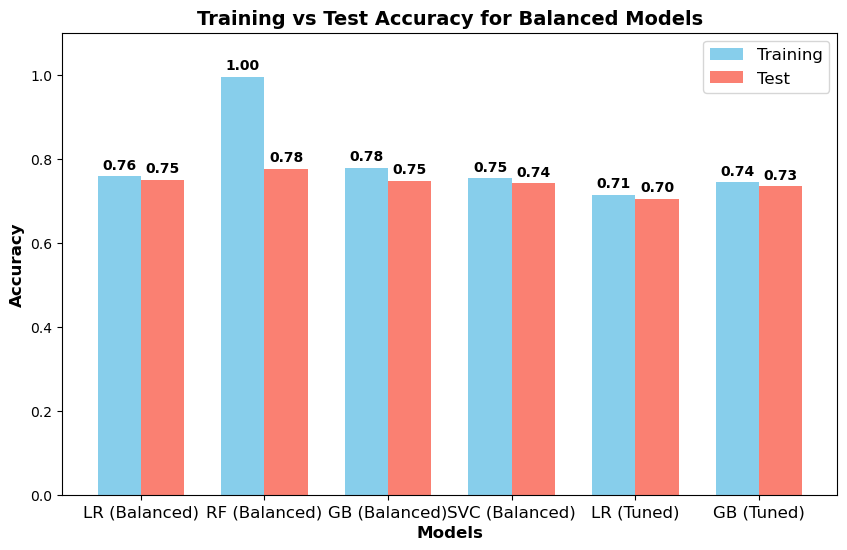

In [115]:
#Compare training accuracy vs validation/test accuracy for balanced models and balanced tuned models
# Simple side-by-side bar chart

# 1. Logistic Regression (Balanced)
y_pred_lr_train = lr_balanced.predict(X_train)
train_acc_lr = accuracy_score(y_train, y_pred_lr_train)
test_acc_lr = accuracy_score(y_test, y_pred_lr_bal)

# 2. Random Forest (Balanced)
y_pred_rf_train = rf_balanced.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_pred_rf_train)
test_acc_rf = accuracy_score(y_test, y_pred_rf_bal)

# 3. Gradient Boosting (Balanced)
y_pred_gb_train = gb_balanced.predict(X_train)
train_acc_gb = accuracy_score(y_train, y_pred_gb_train)
test_acc_gb = accuracy_score(y_test, y_pred_gb_bal)

# 4. Linear SVC (Balanced)
y_pred_svc_train = svc_balanced.predict(X_train)
train_acc_svc = accuracy_score(y_train, y_pred_svc_train)
test_acc_svc = accuracy_score(y_test, y_pred_svc_bal)

# 5. Logistic regression (balanced+tuned)
y_pred_lr_tuned_train = lr_balanced_tuned.predict(X_train)
train_acc_lr_tuned = accuracy_score(y_train, y_pred_lr_tuned_train)
test_acc_lr_tuned = accuracy_score(y_test, y_pred_lr_tuned)

# 6. Gradient Boosting (balanced+tuned)
y_pred_gb_tuned_train = gb_balanced_tuned.predict(X_train)
train_acc_gb_tuned = accuracy_score(y_train, y_pred_gb_tuned_train)
test_acc_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)

# Data
models = ['LR (Balanced)', 'RF (Balanced)', 'GB (Balanced)', 'SVC (Balanced)', 'LR (Tuned)', 'GB (Tuned)']
train_acc = [train_acc_lr, train_acc_rf, train_acc_gb, train_acc_svc, train_acc_lr_tuned, train_acc_gb_tuned]
test_acc = [test_acc_lr, test_acc_rf, test_acc_gb, test_acc_svc, test_acc_lr_tuned, test_acc_gb_tuned]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, train_acc, width, label='Training', color='skyblue')
bars2 = ax.bar(x + width/2, test_acc, width, label='Test', color='salmon')

#labels
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_title('Training vs Test Accuracy for Balanced Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.1)
# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

The bar chart above compares the training and testing accuracies of four balanced models:
- **Logistic Regression** achieved nearly identical training and testing accuracies (0.76 vs 0.75), indicating strong generalisation and minimal overfitting.
- **Random Forest** reached a perfect training accuracy of 1.00, while its test accuracy dropped to 0.78, suggesting clear overfitting, the model fits the training data almost perfectly but loses generalisation power on unseen data.
- **Gradient Boosting** (0.78 train vs 0.75 test) and **SVC** (0.75 train vs 0.74 test) also show small gaps, implying balanced fitting and stable performance.
- After tuning, **Logistic Regression (Tuned)** showed lower accuracies (0.71 vs 0.70), indicating that tuning reduced overfitting but also slightly increased bias.
- **Gradient Boosting (Tuned)** maintains similar accuracy (0.74 vs 0.75), indicating consistent performance and no significant overfitting.

## 4.3 Summary
Overall, the results show that **Logistic Regression, Gradient Boosting, and SVC** generalise well, with only minor differences between training and testing performance.

**Random Forest**, while delivering the highest training accuracy, exhibits signs of overfitting due to its high model complexity and tendency to memorize training samples.

After tuning, **Logistic Regression and Gradient Boosting** showed improved stability and reduced variance, though not necessarily higher accuracy.

This visualisation confirms **mitigation strategies applied (feature selection, class balancing, hyperparameter tuning, multiple evaluation metrics)** were largely effective in reducing overfitting and maintaining model generalisation.

# 5. eXplainable AI - XAI

## 5.1 LIME

In [116]:
# use LIME for explainability - LR balanced model
from lime.lime_tabular import LimeTabularExplainer

#prepare  data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#train balanced logistic regression model
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_balanced.fit(X_train, y_train)

class_names = ['Not_Churn', 'Churn']

# initialize LIME explainer
# LIME works with numpy arrays
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=class_names,
    mode='classification'
)

#pick an instance from test set to explain
# index of the instance
instance_index = 20
instance_to_explain = X_test.iloc[instance_index].values
true_label = y_test.iloc[instance_index]

def lr_predict_proba(data):
    data_df = pd.DataFrame(data, columns=X_train.columns)
    return lr_balanced.predict_proba(data_df)

# generate explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=lr_predict_proba,
)

# display explanation
predicted_label = lr_balanced.predict(
    pd.DataFrame([instance_to_explain], columns=X_train.columns)
)[0]
print("True class:", class_names[true_label])
print("Predicted class:", class_names[predicted_label])
explanation_list = explanation.as_list()

# Convert to DataFrame
df_explanation = pd.DataFrame(explanation_list, columns=["Feature", "Contribution"])

print(df_explanation)

True class: Churn
Predicted class: Churn
                                   Feature  Contribution
0                       Dependents <= 0.00      0.272558
1                   Tenure Months <= -0.95      0.217690
2   0.00 < Contract_Month-to-month <= 1.00      0.152477
3                Contract_Two year <= 0.00      0.112224
4  Payment_Method_Electronic check <= 0.00     -0.090826
5           0.19 < Monthly Charges <= 0.84      0.079419
6         0.00 < Paperless Billing <= 1.00      0.070148
7                  Online Security <= 0.00      0.067163
8                     Tech Support <= 0.00      0.062560
9                          Partner <= 0.00     -0.058251


### LIME Explanation Summary
Prediction outcome is True Positive - correctly identified a churn customer.

**Positive Factors:**
1. **No dependents (+0.28)**: the strongest predictor in this case
2. **Very low tenure (+0.22)**: tenure ≤ -0.95 means well below average, indicating a very-new customer
3. **Month-to-month contract (+0.15)**: moderate predictor
4. **No two-year contract (+0.11)**: moderate
5. **Paperless Billing (+0.07)**: minor
6. **Higher Monthly Charges (+0.07)**: minor, monthly charges <= 0.84 means well above average
7. **No Online Security (+0.07)**: minor
8. **No Tech Support (+0.07)**: minor

**Negative Factors:**
1. **No Electronic Check Payment (-0.09)**: suggesting auto-payment methond & higher commitment.
2. **No Partner (-0.05)**: minor

#### Model Reasoning:
The model predicted this customer would churn primarily due to their **lack of dependents, short tenure, and having a month-to-month contract**. These features positively increase the likelihood of churn, suggesting that this customer exhibits the classic high-risk profile:
- Single household (no dependents)
- Brand new customer (very low tenure)
- No long-term commitment (month-to-month)

## 5.2 SHAP

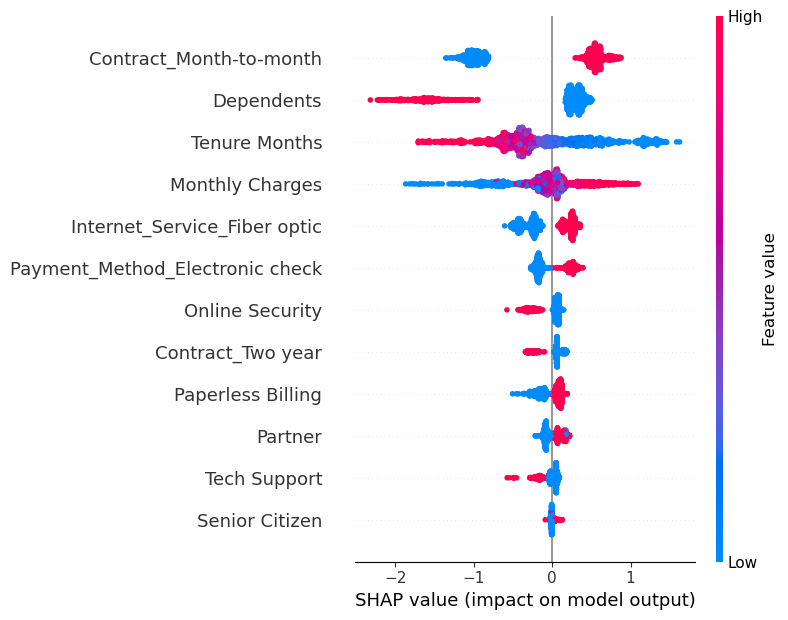

In [120]:
# use SHAP for explainability - LR balanced model
# tree-based model - Gradient Boosting balanced model
import shap

# prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train balanced gradient boosting model
weights = compute_sample_weight(class_weight='balanced', y=y_train)
gb_balanced = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_balanced.fit(X_train, y_train, sample_weight=weights)

# explain predictions using SHAP
explainer_gb = shap.TreeExplainer(gb_balanced)
shap_values_gb = explainer_gb.shap_values(X_test)

# visualize the SHAP values
shap.summary_plot(shap_values_gb, X_test)

### SHAP summary plot
- The features with the highest impact on model output include **Contract type, Dependents, Tenure months, and Monthly charges**. 
- Customers with **month-to-month contracts, no dependents, short tenure, and higher monthly charges** are more likely to churn.
- In contrast, customers with longer contracts, online security, and technical support show a lower likelihood of churn.

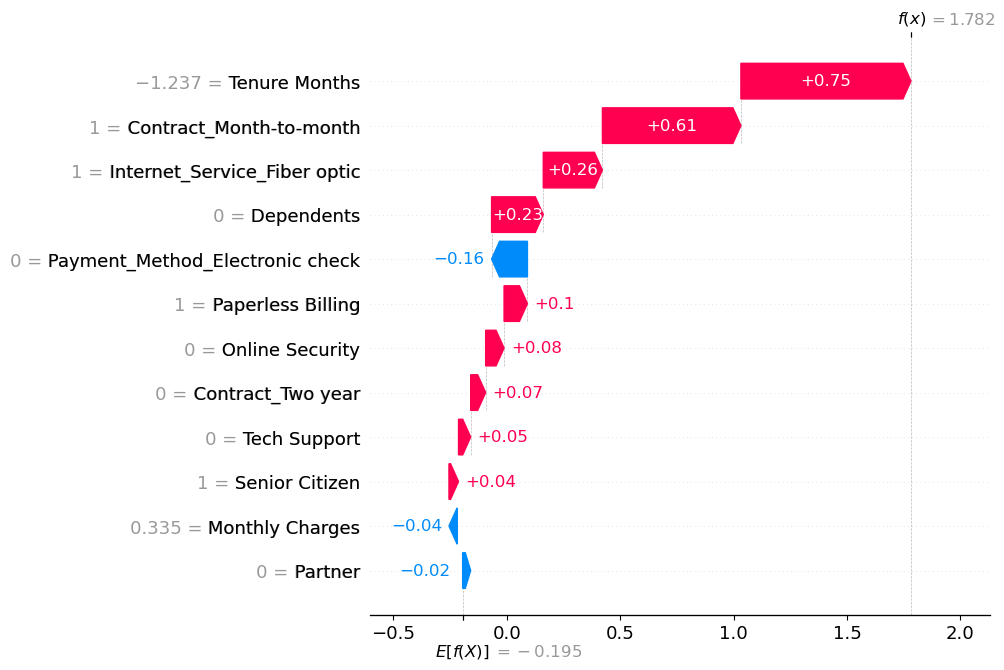

In [118]:
# force plot using waterfall plot
import matplotlib.text as mtext
shap.initjs()

# force plot for a specific instance
instance_index = 20

shap.plots.waterfall(
    shap.Explanation(values=shap_values_gb[instance_index],
                     base_values=explainer_gb.expected_value,
                     data=X_test.iloc[instance_index],
                     feature_names=X_test.columns.tolist()
), max_display=14)


- Baseline value: -0.195
- Tenure months (-1.237, very low tenure) → the strongest positive contribution (+0.75) → pushing prediction to a churn classification
- Month-to-month contract (1=Yes) → strong positive contribution (+0.61)
- Fiber-optic internet (1=yes) → positive contribution (+0.26)
- Other features (no-dependents, paperless billing, online security, two-year contract, tech support, senior citizen) → positive effects
- Not electronic-check payment method, Monthly charges / partner → negative effects
- Final model output: 1.782 for this customer

### SHAP Waterfall Plot
- The base value (-0.195) represents the model’s average prediction across all customers, while each feature’s SHAP value indicates how it shifts the prediction toward higher or lower churn likelihood.
- **short tenure, month-to-month contract, and fiber optic internet service** were the strongest positive contributors, pushing the prediction from the baseline (−0.195) up to 1.782, leading to a churn classification.
- Features such as not paying via electronic check slightly reduced the predicted churn probability.
- Overall, the plot shows that this customer’s short contract duration and lack of loyalty-related features (no dependents, no two-year contract, no security add-ons) collectively drove a strong churn prediction.

## 5.3 Summary and Comparison of LIME vs SHAP

Both LIME and SHAP provide consistent explanations for the churn model:

- **Consistency**: Both methods highlight low tenure, month-to-month contract, and lack of dependents as key churn drivers.

- **Perspective difference:**
    - **LIME** provides local interpretability by approximating the model around a specific instance using a simple surrogate model.
    - **SHAP** offers both global and local interpretability, based on solid theoretical foundations (Shapley values from cooperative game theory), showing exact feature contributions to the final prediction.
- **Interpretation outcome:**
Both explanations reinforce the business insight that short-term, low-commitment customers without dependents are most likely to churn.

Overall, the model explanations are stable and interpretable, increasing trust in the model’s decision-making.